# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

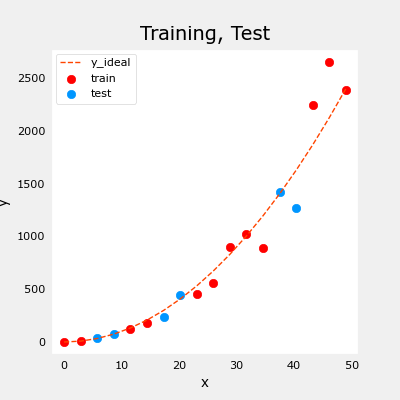

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        error_i = (y[i] - yhat[i])**2
        err += error_i
    err = err / (2*m)
    ### END CODE HERE ### 
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

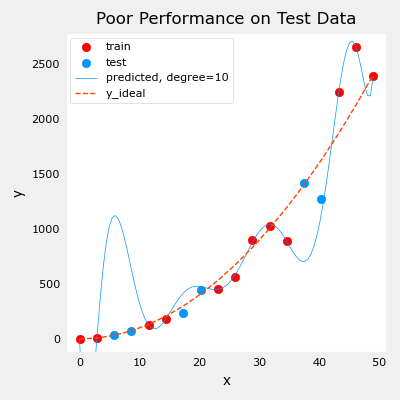

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

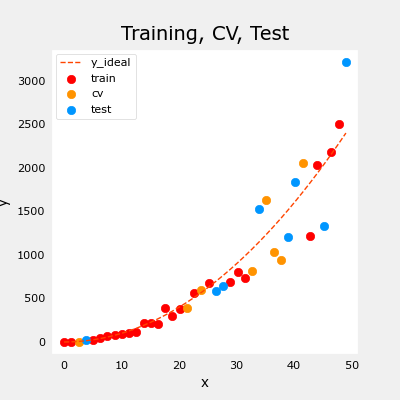

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

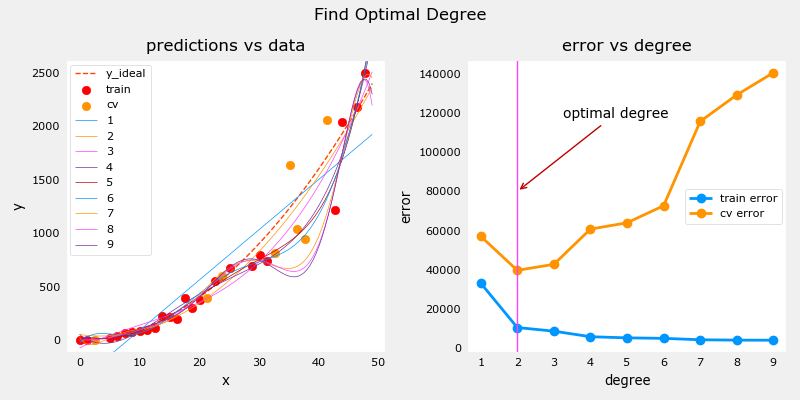

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

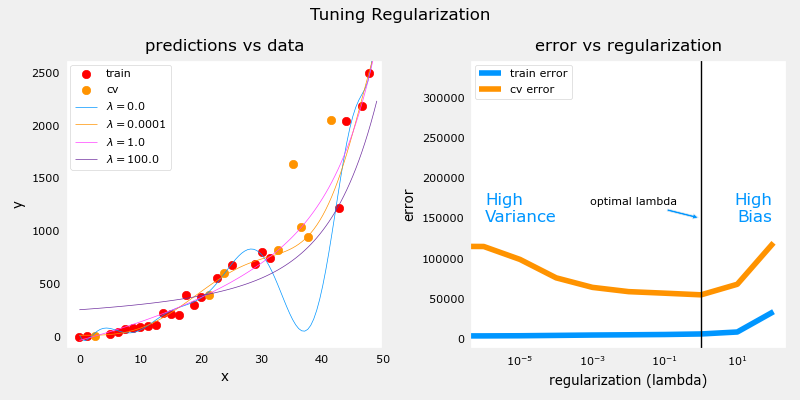

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

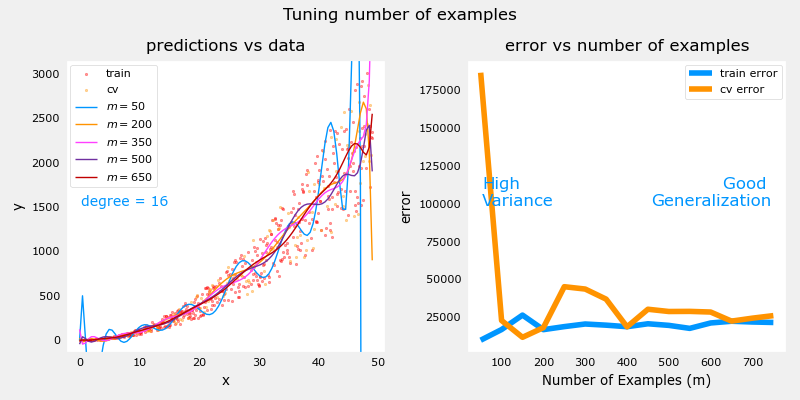

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


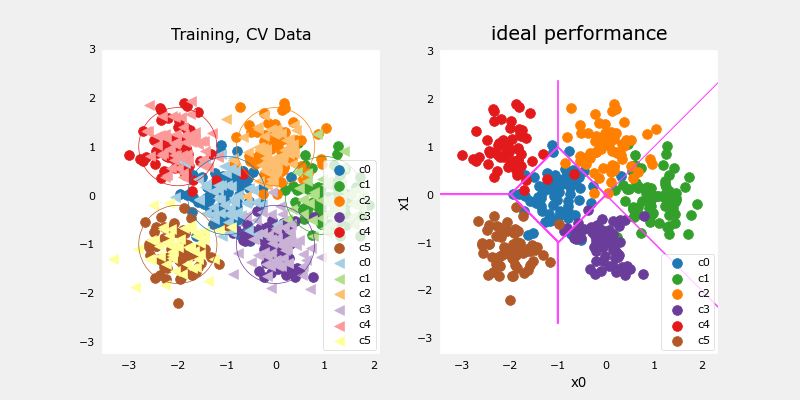

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [102]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
#     incorrect = 0
#     for i in range(m):
#     ### START CODE HERE ### 
#         if y[i] != yhat[i]:
#             incorrect += 1
#     cerr = incorrect / m 
#     ### END CODE HERE ### 
    incorrect = (y != yhat).astype(int).reshape(m,).sum()
    cerr = incorrect/m
    return(cerr)

In [103]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])

In [104]:
incorrect = (y_hat != y_tmp).astype(int).reshape(len(y_hat),)
incorrect

array([0, 0, 1])

In [105]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [20]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(units=120, activation="relu", name="layer1"),
        tf.keras.layers.Dense(units=40, activation="relu", name="layer2"),
        tf.keras.layers.Dense(units=6, activation="linear", name="layer3")
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### END CODE HERE ### 
)

In [21]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 2s 5ms/step - loss: 1.0298
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4101
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3169
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2831
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2733
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2892
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2518
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2244
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2241
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2105
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2163
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2093
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 6ms/step - loss: 0.1599
Epoch 102/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1582
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1730
Epoch 104/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 105/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1501
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1557
Epoch 107/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1615
Epoch 108/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1517
Epoch 109/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1534
Epoch 110/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1388
Epoch 111/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1520
Epoch 112/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1474
Epoch 113/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 299/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 300/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 301/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0623
Epoch 302/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0747
Epoch 303/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1114
Epoch 304/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0885
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0857
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0804
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 309/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0357
Epoch 495/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0334
Epoch 497/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 500/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0310
Epoch 503/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 505/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0381
Epoch 690/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0388
Epoch 691/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329
Epoch 693/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 694/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 696/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0349
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 699/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 701/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0323
Epoch 886/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 887/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 888/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 890/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0216
Epoch 891/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0288
Epoch 893/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0196
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 897/1000
13/1

In [22]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 120)               360       
                                                                 
 layer2 (Dense)              (None, 40)                4840      
                                                                 
 layer3 (Dense)              (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 3s 3ms/step


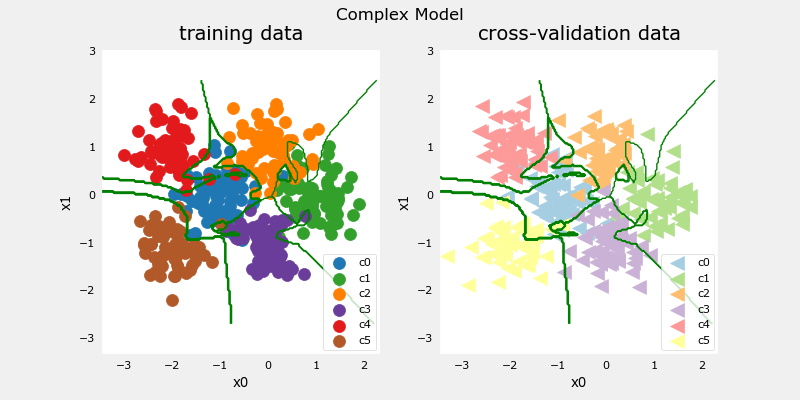

In [23]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [24]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 3ms/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.109


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [25]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(6, activation="relu"),
        Dense(6, activation="linear")
        
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01),
    ### START CODE HERE ### 
)


In [26]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 5ms/step - loss: 2.0920
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.8033
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.6234
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.4579
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.2799
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.1074
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9525
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.8163
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7037
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6139
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5434
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4889
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 3ms/step - loss: 0.1978
Epoch 102/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1978
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2006
Epoch 104/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1941
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1942
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1939
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1923
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1938
Epoch 113/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1853
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1823
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1821
Epoch 301/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 302/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1858
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1832
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1865
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1826
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1831
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1829
Epoch 309/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1808
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 496/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1821
Epoch 497/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1784
Epoch 498/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1794
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1786
Epoch 501/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1820
Epoch 502/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1824
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1804
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1800
Epoch 505/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1783
Epoch 691/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1790
Epoch 692/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1780
Epoch 693/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1789
Epoch 694/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1783
Epoch 695/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1776
Epoch 696/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1768
Epoch 697/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1777
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1767
Epoch 699/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1782
Epoch 700/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1780
Epoch 701/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1752
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1768
Epoch 887/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1755
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1762
Epoch 890/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1771
Epoch 891/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1753
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1766
Epoch 893/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1770
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1777
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1759
Epoch 896/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1778
Epoch 897/1000
13/1

In [27]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 3s 2ms/step


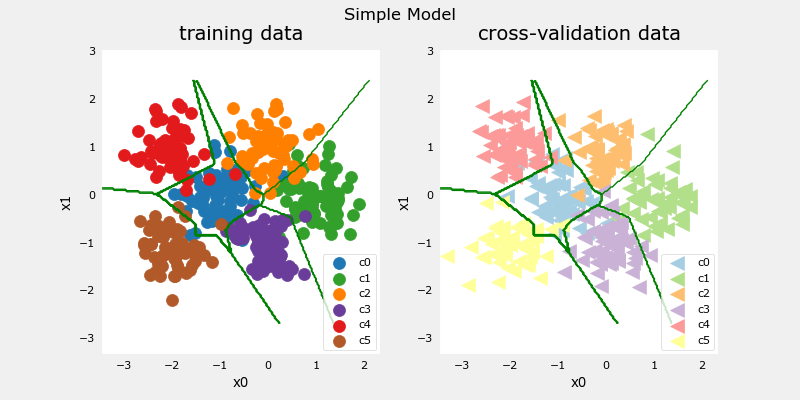

In [28]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [29]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 2ms/step
categorization error, training, simple model, 0.075, complex model: 0.007
categorization error, cv,       simple model, 0.069, complex model: 0.109


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [108]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120, activation="relu", name="layer1", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation= "relu", name="layer2", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6, activation="linear", name="layer3")
        
        
        ### START CODE HERE ### 
    ], name= 'complex_model'
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01)
    ### START CODE HERE ### 
)


In [109]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 6ms/step - loss: 4.4639
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.6844
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.3434
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.0807
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9930
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9572
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9202
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8673
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8064
Epoch 10/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7690
Epoch 11/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7490
Epoch 12/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7485
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 6ms/step - loss: 0.4791
Epoch 102/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4647
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4653
Epoch 104/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4588
Epoch 105/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5014
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4531
Epoch 107/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4593
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4713
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4585
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4528
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4561
Epoch 112/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4477
Epoch 113/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3865
Epoch 298/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3922
Epoch 299/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3917
Epoch 300/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4254
Epoch 301/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3925
Epoch 302/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3913
Epoch 303/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3909
Epoch 304/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3767
Epoch 305/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3808
Epoch 306/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3853
Epoch 307/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3899
Epoch 308/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3891
Epoch 309/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3500
Epoch 494/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3543
Epoch 495/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3523
Epoch 496/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3740
Epoch 497/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3914
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3462
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3457
Epoch 500/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3657
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3566
Epoch 502/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3570
Epoch 503/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3879
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3705
Epoch 505/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3919
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3740
Epoch 691/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3464
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3540
Epoch 693/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3424
Epoch 694/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3683
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3434
Epoch 696/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3406
Epoch 697/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3509
Epoch 698/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3959
Epoch 699/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3599
Epoch 700/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3614
Epoch 701/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3510
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3407
Epoch 887/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3291
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3408
Epoch 889/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3350
Epoch 890/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3651
Epoch 891/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3302
Epoch 892/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3302
Epoch 893/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3508
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3471
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3800
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3645
Epoch 897/1000
13/1

In [114]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "complex_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 120)               360       
                                                                 
 layer2 (Dense)              (None, 40)                4840      
                                                                 
 layer3 (Dense)              (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
ddd
All tests passed!


In [115]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_rr = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120, activation="relu", name="layer1", kernel_regularizer=tf.keras.regularizers.l1_l2()),
        Dense(40, activation= "relu", name="layer2", kernel_regularizer=tf.keras.regularizers.l1_l2()),
        Dense(6, activation="linear", name="layer3")
        
        
        ### START CODE HERE ### 
    ], name= 'complex_model'
)
model_rr.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01)
    ### START CODE HERE ### 
)


In [116]:
# BEGIN UNIT TEST
model_rr.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 2s 5ms/step - loss: 4.6571
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.0102
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.4596
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.1634
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0111
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9501
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8831
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8166
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7678
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7206
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6908
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6733
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 6ms/step - loss: 0.4286
Epoch 102/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4206
Epoch 103/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4342
Epoch 104/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4198
Epoch 105/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4167
Epoch 106/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4110
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4648
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4200
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4183
Epoch 110/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4106
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4109
Epoch 112/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4107
Epoch 113/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3811
Epoch 298/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3882
Epoch 299/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3700
Epoch 300/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3943
Epoch 301/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3782
Epoch 302/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3757
Epoch 303/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3774
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3911
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4093
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3787
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3922
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3786
Epoch 309/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3609
Epoch 494/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3708
Epoch 495/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3605
Epoch 496/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3756
Epoch 497/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3640
Epoch 498/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3495
Epoch 499/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3513
Epoch 500/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3662
Epoch 501/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3639
Epoch 502/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3590
Epoch 503/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3715
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3589
Epoch 505/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3561
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3484
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3479
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3454
Epoch 693/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3511
Epoch 694/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3546
Epoch 695/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3488
Epoch 696/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3436
Epoch 697/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3480
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3540
Epoch 699/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3449
Epoch 700/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3530
Epoch 701/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3523
Epoch 886/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3462
Epoch 887/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3414
Epoch 888/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3492
Epoch 889/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3408
Epoch 890/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3451
Epoch 891/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3603
Epoch 892/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3339
Epoch 893/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3518
Epoch 894/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3471
Epoch 895/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3535
Epoch 896/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3523
Epoch 897/1000
13/1

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

In [118]:
# BEGIN UNIT TEST
model_rr.summary()

# model_r_test(model_rr, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "complex_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 120)               360       
                                                                 
 layer2 (Dense)              (None, 40)                4840      
                                                                 
 layer3 (Dense)              (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 3s 3ms/step


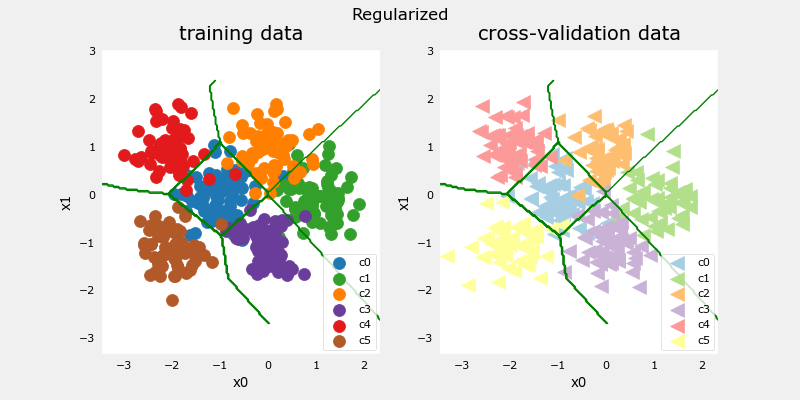

In [121]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

1082/1082 [==============================] - 3s 3ms/step


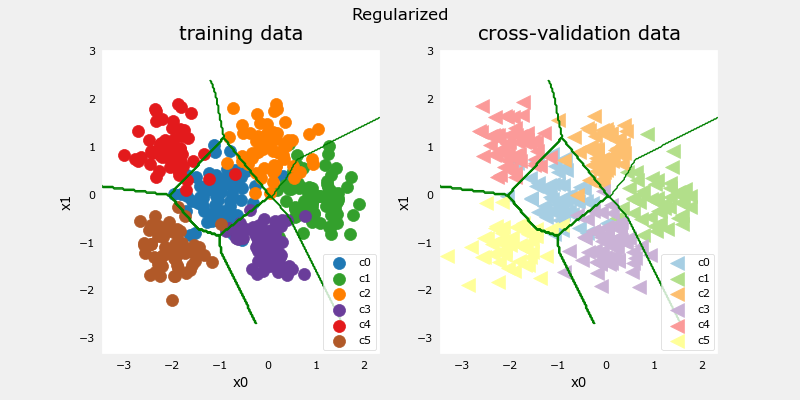

In [122]:
#make a model for plotting routines to call
model_predict_rr = lambda Xl: np.argmax(tf.nn.softmax(model_rr.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_rr, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [123]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 4ms/step
categorization error, training, regularized: 0.075, simple model, 0.075, complex model: 0.007
categorization error, cv,       regularized: 0.072, simple model, 0.069, complex model: 0.109


In [124]:
training_cerr_reg = eval_cat_err(y_train, model_predict_rr(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_rr(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_rr(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 8ms/step
categorization error, training, regularized: 0.065, simple model, 0.075, complex model: 0.007
categorization error, cv,       regularized: 0.072, simple model, 0.069, complex model: 0.109


The simple model is a bit better in the training set than the regularized model but worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [130]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
models

[None, None, None, None, None, None, None]

In [35]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 1s 5ms/step - loss: 1.0658
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3877
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3040
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2774
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2548
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2685
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2334
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2253
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2264
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1969
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2139
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2041
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 4ms/step - loss: 0.1591
Epoch 102/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1613
Epoch 103/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1857
Epoch 104/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1512
Epoch 106/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1507
Epoch 108/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1370
Epoch 109/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1418
Epoch 110/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1352
Epoch 111/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1403
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1532
Epoch 113/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0585
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 299/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0607
Epoch 300/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0663
Epoch 301/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 302/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0769
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 304/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0628
Epoch 305/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0663
Epoch 306/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 307/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0804
Epoch 308/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0607
Epoch 309/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0297
Epoch 497/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0285
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0322
Epoch 502/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0338
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0291
Epoch 504/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 505/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0340
Epoch 690/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0319
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297
Epoch 692/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 693/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0313
Epoch 694/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0304
Epoch 695/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 696/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334
Epoch 697/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0308
Epoch 698/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0294
Epoch 699/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321
Epoch 700/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0302
Epoch 701/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 886/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0243
Epoch 887/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 888/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0245
Epoch 889/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0259
Epoch 890/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0255
Epoch 891/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0227
Epoch 892/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 893/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0247
Epoch 894/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 895/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 896/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 897/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2443
Epoch 83/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2292
Epoch 84/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2307
Epoch 85/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2520
Epoch 86/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2349
Epoch 87/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2297
Epoch 88/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2353
Epoch 89/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2313
Epoch 90/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2276
Epoch 91/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2227
Epoch 92/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2201
Epoch 93/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2233
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 7ms/step - loss: 0.2124
Epoch 182/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2079
Epoch 183/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2078
Epoch 184/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2161
Epoch 185/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2103
Epoch 186/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2071
Epoch 187/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2048
Epoch 188/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2056
Epoch 189/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2039
Epoch 190/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2136
Epoch 191/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2201
Epoch 192/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2104
Epoch 193/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1769
Epoch 378/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1810
Epoch 379/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1845
Epoch 380/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1806
Epoch 381/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1831
Epoch 382/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1899
Epoch 383/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1961
Epoch 384/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1886
Epoch 385/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1795
Epoch 386/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1768
Epoch 387/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1807
Epoch 388/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1852
Epoch 389/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1833
Epoch 574/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1704
Epoch 575/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 576/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1621
Epoch 577/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1718
Epoch 578/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 579/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1645
Epoch 580/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1781
Epoch 581/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 582/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1580
Epoch 583/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1662
Epoch 584/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1772
Epoch 585/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.1580
Epoch 770/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 771/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1676
Epoch 772/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1596
Epoch 773/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1627
Epoch 774/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1652
Epoch 775/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1724
Epoch 776/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1555
Epoch 777/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1670
Epoch 778/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1685
Epoch 779/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 780/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 781/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1567
Epoch 966/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1603
Epoch 967/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 968/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1803
Epoch 969/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1652
Epoch 970/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 971/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1529
Epoch 972/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1528
Epoch 973/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1583
Epoch 974/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1602
Epoch 975/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1649
Epoch 976/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1600
Epoch 977/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2832
Epoch 164/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2964
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2960
Epoch 166/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2959
Epoch 167/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2915
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2841
Epoch 169/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2858
Epoch 170/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2867
Epoch 171/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2728
Epoch 172/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2635
Epoch 173/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 174/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3015
Epoch 175/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.2518
Epoch 360/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2667
Epoch 361/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2604
Epoch 362/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2849
Epoch 363/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2839
Epoch 364/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2718
Epoch 365/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2528
Epoch 366/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2577
Epoch 367/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2810
Epoch 368/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2852
Epoch 369/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2696
Epoch 370/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2563
Epoch 371/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2451
Epoch 556/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2335
Epoch 557/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2384
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2558
Epoch 559/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2838
Epoch 560/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2566
Epoch 561/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2444
Epoch 562/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2677
Epoch 563/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2390
Epoch 564/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2415
Epoch 565/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2351
Epoch 566/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2404
Epoch 567/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2386
Epoch 752/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 753/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2238
Epoch 754/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2383
Epoch 755/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2297
Epoch 756/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2437
Epoch 757/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2431
Epoch 758/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2336
Epoch 759/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 760/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2402
Epoch 761/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2581
Epoch 762/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2373
Epoch 763/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2411
Epoch 948/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2517
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2302
Epoch 950/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2213
Epoch 951/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2297
Epoch 952/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2551
Epoch 953/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2402
Epoch 954/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2302
Epoch 955/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2307
Epoch 956/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2287
Epoch 957/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2363
Epoch 958/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2422
Epoch 959/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3617
Epoch 146/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3602
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3903
Epoch 148/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3698
Epoch 149/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3616
Epoch 150/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3582
Epoch 151/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3585
Epoch 152/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3524
Epoch 153/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3766
Epoch 154/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3590
Epoch 155/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3613
Epoch 156/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3614
Epoch 157/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3305
Epoch 342/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3362
Epoch 343/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3279
Epoch 344/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3228
Epoch 345/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3221
Epoch 346/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3282
Epoch 347/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3412
Epoch 348/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3526
Epoch 349/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3158
Epoch 350/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3381
Epoch 351/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3186
Epoch 352/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3439
Epoch 353/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3616
Epoch 538/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3236
Epoch 539/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2964
Epoch 540/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3151
Epoch 541/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3308
Epoch 542/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3357
Epoch 543/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3275
Epoch 544/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3183
Epoch 545/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3066
Epoch 546/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3183
Epoch 547/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3369
Epoch 548/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3110
Epoch 549/1000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3004
Epoch 734/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3229
Epoch 735/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3155
Epoch 736/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3171
Epoch 737/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3329
Epoch 738/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2956
Epoch 739/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3071
Epoch 740/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3114
Epoch 741/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3210
Epoch 742/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3443
Epoch 743/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3004
Epoch 744/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2938
Epoch 745/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3059
Epoch 930/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3144
Epoch 931/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 932/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2952
Epoch 933/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3039
Epoch 934/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3339
Epoch 935/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2989
Epoch 936/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2886
Epoch 937/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 938/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3074
Epoch 939/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3057
Epoch 940/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3082
Epoch 941/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.6136
Epoch 29/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5972
Epoch 30/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6176
Epoch 31/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6111
Epoch 32/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6308
Epoch 33/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6109
Epoch 34/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6716
Epoch 35/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6600
Epoch 36/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6182
Epoch 37/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5824
Epoch 38/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5634
Epoch 39/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5643
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 5ms/step - loss: 0.4308
Epoch 226/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4255
Epoch 227/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4490
Epoch 228/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3934
Epoch 229/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4031
Epoch 230/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4149
Epoch 231/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4020
Epoch 232/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4121
Epoch 233/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3892
Epoch 234/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3882
Epoch 235/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3881
Epoch 236/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3958
Epoch 237/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3831
Epoch 422/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3924
Epoch 423/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3710
Epoch 424/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3725
Epoch 425/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3651
Epoch 426/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3667
Epoch 427/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3674
Epoch 428/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3769
Epoch 429/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3756
Epoch 430/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3772
Epoch 431/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3587
Epoch 432/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3632
Epoch 433/1000
13/1


KeyboardInterrupt



In [ ]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

In [ ]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>